In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Part 1

Consider the following grid world problem.

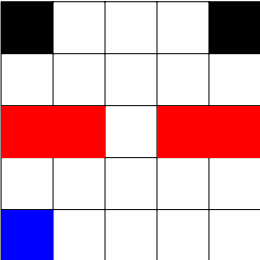

The agent starts at the blue square and moves to a neighbouring state with equal probability. If the agent moves to a red state, it receives a reward of −20 and goes back to the start, i.e., the blue square. A move between any two other states receives a reward of −1. A move that attempts to move outside of the grid receives a reward of −1. The black squares serve as a terminal states. Intuitively, you can see how the goal here is to pass through the opening in the red “wall” and get to one of the black squares and hence terminate the episode. Use the Sarsa and Q-learning algorithms to learn the optimal policy for this task. Plot a trajectory of an agent utlizing the policy learned by each of the methods. Are they different or similar? Why or why not? You may assume to use ϵ-greedy action selection for this task. How does the sum of rewards over an episode behaves for each of these two methods.

### SARSA

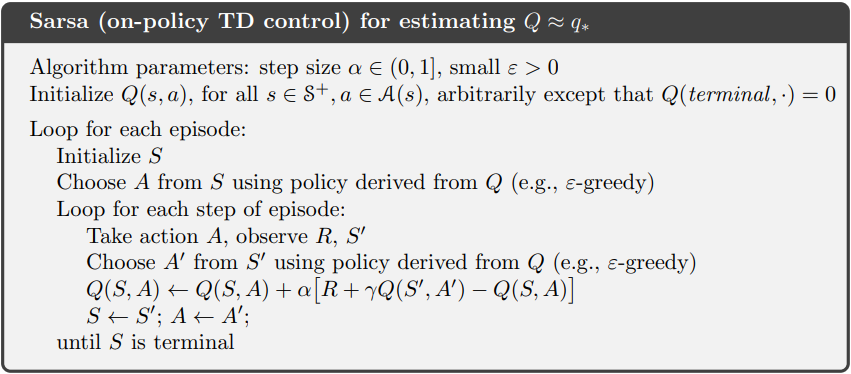

In [2]:
Grid_size = 5

Alpha = 0.1

Gamma = 0.95

step = [[-1,0],[1,0],[0,-1],[0,1]] #Up #Down #Left #Right
step_c = ["Up", "Down", "Left", "Right"]
Q_SARSA = np.zeros((Grid_size,Grid_size))



In [3]:
def Reward_And_Transition_Part_1(Current_Step, Action):

    if Current_Step == [0,0]:
        Next_Step = [0,0]
        Reward = 0
        return  Next_Step, Reward
    
    elif Current_Step == [0,4]:
        Next_Step = [0,4]
        Reward = 0
        return  Next_Step, Reward
    
    if Current_Step == [2,0] or Current_Step == [2,1] or Current_Step == [2,3] or Current_Step == [2,4]:
        Next_Step = [4,0]
        Reward = -20
        return  Next_Step, Reward

    Next_Step = [a + b for a, b in zip(Current_Step, Action)]
    Reward = -1
    
    if Next_Step[0] < 0 or Next_Step[0] > 4 or Next_Step[1] < 0 or Next_Step[1] > 4:
        Reward = -1
        return Current_Step, Reward
    

    return Next_Step, Reward

In [4]:
  
def Next_Action_EGreedy(Q, i,j,epsilon = 0.1):
    if random.uniform(0, 1) < epsilon:
        Random_number = random.randint(0,3)
        Action = step[Random_number]
    else:
        if i == 0:
            i = 1
        if i == 4:
            i = 3
        if j == 0:
            j = 1
        if j == 4:
            j = 3

        up = Q[i-1,j]
        down = Q[i+1,j]
        left = Q[i,j-1]
        right = Q[i,j+1]
        Max_Value = np.argmax([up,down,left,right])
        Action = step[Max_Value]
    return Action
    

In [5]:
def Plot_Policy(Q):
    Q = np.pad(Q, pad_width=1, mode='constant', constant_values=-100)

    matrix = [['' for _ in range(Grid_size)] for _ in range(Grid_size)]

    for i in range(1,Grid_size+1):
        for j in range(1,Grid_size+1):
            up = Q[i-1,j]
            down = Q[i+1,j]
            left = Q[i,j-1]
            right = Q[i,j+1]
            
            Max_Value = np.argmax([up,down,left,right])
            matrix[i-1][j-1] = step_c[Max_Value]
            #print(Q[i,j])
            #print(step_c[Max_Value])
            #print([up,down,left,right])

    fig, ax = plt.subplots()
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

    for i in range(Grid_size):
        for j in range(Grid_size):
            ax.text(j, i, matrix[i][j], va='center', ha='center')

    ax.set_xlim(-0.5, Grid_size - 0.5)
    ax.set_ylim(Grid_size - 0.5, -0.5)

    plt.show()

In [6]:
for i in range(100000):
    Current_Position = [4,0]
    while True:
        
        Action = Next_Action_EGreedy(Q_SARSA,Current_Position[0], Current_Position[1])
        Next_Position, Reward = Reward_And_Transition_Part_1(Current_Position, Action)
        Q_SARSA[Current_Position[0], Current_Position[1]] += Alpha * (Reward + Gamma * (Q_SARSA[Next_Position[0], Next_Position[1]] - Q_SARSA[Current_Position[0], Current_Position[1]])    )
        Current_Position = Next_Position
        if Reward == 0:
            break 

#### Trajectory 

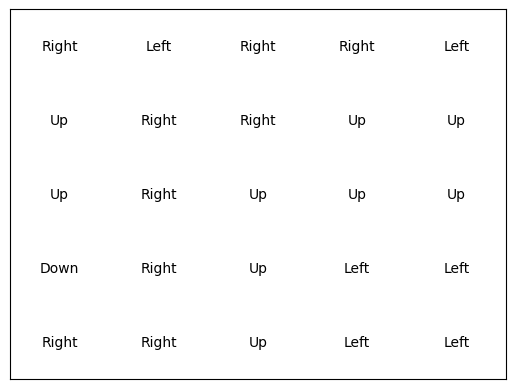

In [7]:
Plot_Policy(Q_SARSA) 

#### Matrix Value

In [8]:
np.round(Q_SARSA, decimals=3)

array([[  0.   , -36.174, -27.099, -19.489,   0.   ],
       [-39.717, -35.366, -27.274, -22.764, -21.417],
       [-62.929, -63.464, -29.993, -63.65 , -64.528],
       [-44.039, -42.353, -32.653, -44.606, -47.867],
       [-40.22 , -37.825, -35.249, -45.193, -51.038]])

### Q-Learning

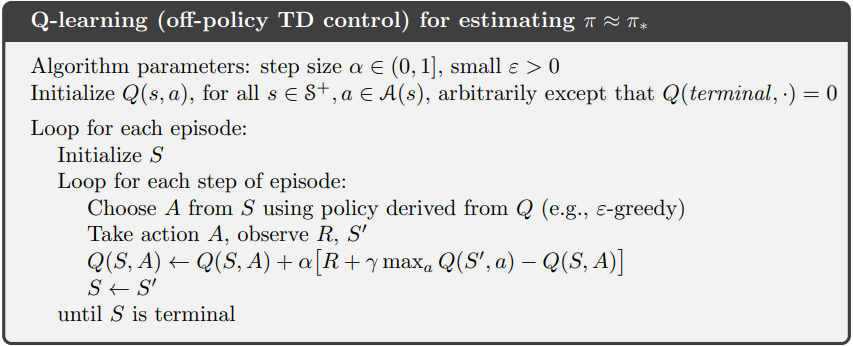

In [9]:
Q_Learning = np.zeros((5,5))

In [11]:
for i in range(100000):
    Current_Position = [4,0]
    while True:

        Action = Next_Action_EGreedy(Q_Learning, Current_Position[0], Current_Position[1], epsilon=0.2)

        Next_Position, Reward = Reward_And_Transition_Part_1(Current_Position, Action)

        Q_Learning[Current_Position[0], Current_Position[1]] += Alpha * (Reward + Gamma * (Q_Learning[Next_Position[0], Next_Position[1]] - Q_Learning[Current_Position[0], Current_Position[1]]) )
        
        
        Current_Position = Next_Position
        if Reward == 0:
            break 

In [12]:
np.round(Q_Learning, decimals=3)

array([[  0.   , -22.443, -30.241, -22.705,   0.   ],
       [-23.839, -31.094, -31.626, -32.478, -24.976],
       [-58.739, -62.701, -33.841, -62.941, -60.035],
       [-44.198, -40.763, -37.417, -42.512, -42.563],
       [-42.784, -41.818, -39.975, -44.139, -47.221]])

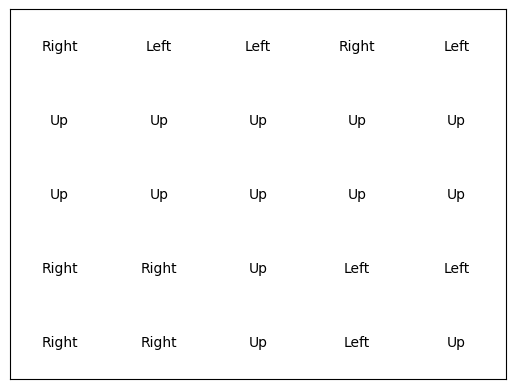

In [13]:
Plot_Policy(Q_Learning)

## Part 2

Consider a scenario where we have a random walk on a 7 × 7 grid. That is, we are equally likely to move up, down, left, or right. Suppose that we start the random walk at the precise center of the grid.

We assume that the lower left and upper right corners are terminal states, with, respectively, rewards of −1 and 1. Rewards for transitions between two states are 0, if an attempt to transition outside the wall is made, the agent stays in the same spot and receives a reward of 0. Compute the value function for this “random walk” policy using (1) gradient Monte Carlo method and (2) the semi-gradient TD(0) method with an affine function approximation. How does it compare to the exact value function?

### Gradient Monte Carlo

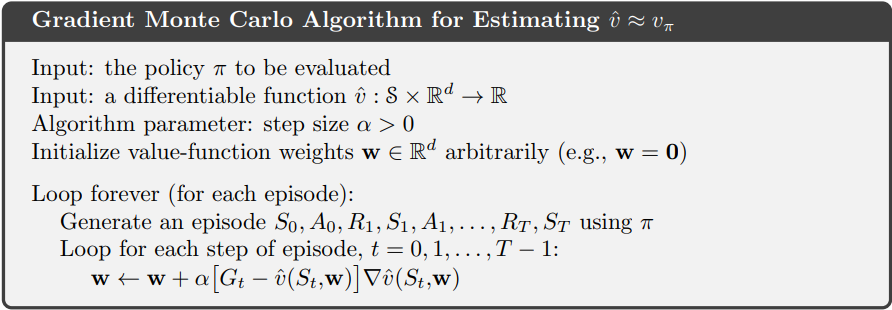

In [39]:
Grid_size_2 = 7

Alpha = 0.1

Gamma = 0.95

step = [[-1,0],[1,0],[0,-1],[0,1]] #Up #Down #Left #Right
step_c = ["Up", "Down", "Left", "Right"]
Q_MC = np.zeros((Grid_size_2,Grid_size_2))

In [33]:
def Reward_And_Transition_Part_2(Current_Step, Action):

    if Current_Step == [6,0]:
        Next_Step = [6,0]
        Reward = -1
        return  Next_Step, Reward
    
    elif Current_Step == [0,6]:
        Next_Step = [0,6]
        Reward = 1
        return  Next_Step, Reward

    Next_Step = [a + b for a, b in zip(Current_Step, Action)]
    Reward = 0
    
    if Next_Step[0] < 0 or Next_Step[0] > (Grid_size_2 - 1) or Next_Step[1] < 0 or Next_Step[1] > (Grid_size_2 - 1):
        Reward = 0
        return Current_Step, Reward
    return Next_Step, Reward

In [34]:
def Next_Action_MC(i, j):
    Random_number = random.randint(0,3)
    Action = step[Random_number]
    return Action

In [35]:
def Update_Value(Reward_list, State_list):
    W = 0
    for i in range(len(Reward_list) -1, -1, -1):
        W += Gamma * Reward_list[i]
        Q_MC[State_list[i][0], State_list[i][1]] += Alpha * (W - Q_MC[State_list[i][0], State_list[i][1]])

In [40]:
episodes = 1000
for i in range(episodes):
    Current_Position = [3,3]
    Reward_list = []
    State_list = []
    while True:
        
        Action = Next_Action_MC(Current_Position[0], Current_Position[1])
        Next_Position, Reward = Reward_And_Transition_Part_2(Current_Position, Action)

        State_list.append(Current_Position)
        Reward_list.append(Reward)
        Update_Value(Reward_list, State_list)
                 
        Current_Position = Next_Position
        if Reward == 1 or Reward == -1:
            break 

In [41]:
np.round(Q_MC, decimals = 4)

array([[ 0.4956,  0.582 ,  0.0978,  0.2875,  0.4962,  0.5075,  0.95  ],
       [ 0.389 ,  0.4956,  0.1806,  0.3279,  0.2207,  0.4563,  0.2412],
       [ 0.4451,  0.3267,  0.2575,  0.1013,  0.1827,  0.2073,  0.1295],
       [ 0.1805,  0.0951,  0.1805,  0.2575,  0.1827,  0.1794,  0.1795],
       [-0.4451, -0.2625,  0.095 ,  0.1805,  0.1019,  0.0838,  0.3265],
       [-0.4121, -0.2486, -0.046 ,  0.0913,  0.1026,  0.389 ,  0.4451],
       [-0.95  , -0.0635,  0.1407, -0.3584,  0.0059,  0.257 ,  0.0671]])

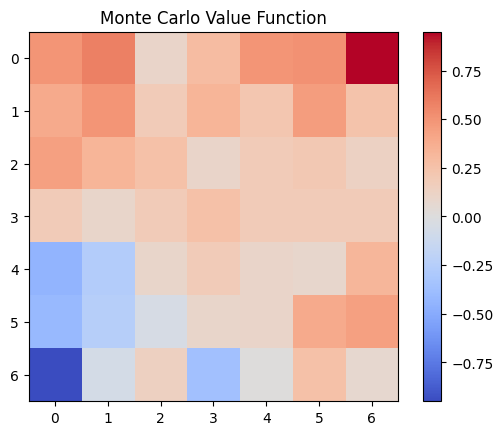

In [42]:
plt.imshow(Q_MC, cmap='coolwarm')
plt.colorbar()  # Show color scale
plt.title('Monte Carlo Value Function')
plt.show()